In [13]:
# Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv(r'C:\Users\SUBHADEEP\Documents\GitHub\Stock-Price-Prediction\input\trainset.csv',index_col="Date",parse_dates=True)

In [15]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-31,3742.80,3760.00,3731.30,3738.35,1207141
2021-12-30,3681.35,3740.00,3680.00,3733.75,1966475
2021-12-29,3692.25,3719.95,3685.00,3694.70,1456923
2021-12-28,3710.00,3725.00,3693.85,3706.55,1456218
2021-12-27,3671.00,3700.00,3653.10,3696.10,1534135


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1978 entries, 2021-12-31 to 2014-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1978 non-null   float64
 1   High    1978 non-null   float64
 2   Low     1978 non-null   float64
 3   Close   1978 non-null   float64
 4   Volume  1978 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 92.7 KB


<AxesSubplot:xlabel='Date'>

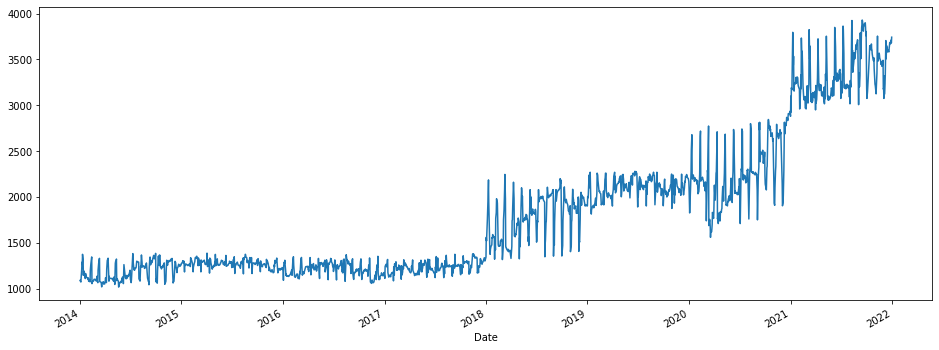

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [17]:
training_set = dataset.iloc[:,1:2].values
training_set

array([[3760.  ],
       [3740.  ],
       [3719.95],
       ...,
       [1114.13],
       [1093.58],
       [1092.5 ]])

In [18]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
training_set_scaled

array([[0.92209157],
       [0.91531397],
       [0.90851943],
       ...,
       [0.02546003],
       [0.01849605],
       [0.01813006]])

In [21]:
# Creating a data structure with 60 timestamps and 1 output

x_train = []
y_train = []
for i in range(60,1978):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)


In [22]:
x_train.shape

(1918, 60)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [24]:
#RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [25]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [26]:
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [28]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [29]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [30]:
regressor.add(Dense(units = 1))

In [31]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [32]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
60/60 [==============================] - 7s 45ms/step - loss: 0.0127
Epoch 2/100
60/60 [==============================] - 3s 45ms/step - loss: 0.0028
Epoch 3/100
60/60 [==============================] - 3s 47ms/step - loss: 0.0026
Epoch 4/100
60/60 [==============================] - 3s 46ms/step - loss: 0.0024
Epoch 5/100
60/60 [==============================] - 3s 47ms/step - loss: 0.0020
Epoch 6/100
60/60 [==============================] - 3s 43ms/step - loss: 0.0021
Epoch 7/100
60/60 [==============================] - 3s 43ms/step - loss: 0.0017
Epoch 8/100
60/60 [==============================] - 3s 43ms/step - loss: 0.0017
Epoch 9/100
60/60 [==============================] - 3s 44ms/step - loss: 0.0017
Epoch 10/100
60/60 [==============================] - 3s 43ms/step - loss: 0.0016
Epoch 11/100
60/60 [==============================] - 3s 43ms/step - loss: 0.0020
Epoch 12/100
60/60 [==============================] - 3s 44ms/step - loss: 0.0017
Epoch 13/100
60/60 [=====

In [230]:
#Visualising the predictions
dataset_test = pd.read_csv(r'C:\Users\SUBHADEEP\Documents\GitHub\Stock-Price-Prediction\input\testset.csv',index_col="Date",parse_dates=True)

In [231]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [232]:
dataset_total = pd.concat((dataset['Open'],dataset_test['Open']),axis = 0)
dataset_total

Date
2021-12-31    3742.80
2021-12-30    3681.35
2021-12-29    3692.25
2021-12-28    3710.00
2021-12-27    3671.00
               ...   
2021-08-11    3539.00
2021-04-11    3515.00
2021-03-11    3508.00
2021-02-11    3495.00
2021-01-11    3438.00
Name: Open, Length: 2045, dtype: float64

In [233]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([1075.75, 1074.85, 1066.  , 1063.5 , 1061.  , 1019.5 , 1039.  ,
       1069.85, 1074.75, 1077.5 , 1073.08, 1074.1 , 1112.5 , 1125.  ,
       1127.  , 1126.53, 1119.  , 1135.  , 1084.  , 1095.5 , 1095.  ,
       1103.  , 1101.5 , 1101.1 , 1085.5 , 1083.35, 1084.5 , 1069.5 ,
       1054.5 , 1061.85, 1047.5 , 1072.5 , 1092.5 , 1095.  , 1080.  ,
       1089.53, 1113.5 , 1115.  , 1102.  , 1115.55, 1112.25, 1118.  ,
       1127.  , 1136.95, 1147.5 , 1165.08, 1110.  , 1150.  , 1190.  ,
       1171.5 , 1190.  , 1145.  , 1125.  , 1115.  , 1107.43, 1119.15,
       1113.  , 1087.5 , 1080.  , 1090.  , 3810.  , 3845.  , 3823.  ,
       3780.  , 3742.2 , 3659.  , 3740.  , 3771.  , 3841.  , 3814.  ,
       3915.  , 4018.  , 4045.5 , 3998.  , 3880.  , 3934.  , 3927.8 ,
       3859.  , 3974.  , 3809.1 , 3816.  , 3865.  , 3829.05, 3744.  ,
       3736.05, 3693.  , 3700.  , 3715.  , 3670.  , 3676.  , 3640.5 ,
       3612.  , 3585.  , 3570.1 , 3601.  , 3580.  , 3610.  , 3601.  ,
       3647.  , 3585

In [234]:
inputs = inputs.reshape(-1,1)
inputs

array([[1075.75],
       [1074.85],
       [1066.  ],
       [1063.5 ],
       [1061.  ],
       [1019.5 ],
       [1039.  ],
       [1069.85],
       [1074.75],
       [1077.5 ],
       [1073.08],
       [1074.1 ],
       [1112.5 ],
       [1125.  ],
       [1127.  ],
       [1126.53],
       [1119.  ],
       [1135.  ],
       [1084.  ],
       [1095.5 ],
       [1095.  ],
       [1103.  ],
       [1101.5 ],
       [1101.1 ],
       [1085.5 ],
       [1083.35],
       [1084.5 ],
       [1069.5 ],
       [1054.5 ],
       [1061.85],
       [1047.5 ],
       [1072.5 ],
       [1092.5 ],
       [1095.  ],
       [1080.  ],
       [1089.53],
       [1113.5 ],
       [1115.  ],
       [1102.  ],
       [1115.55],
       [1112.25],
       [1118.  ],
       [1127.  ],
       [1136.95],
       [1147.5 ],
       [1165.08],
       [1110.  ],
       [1150.  ],
       [1190.  ],
       [1171.5 ],
       [1190.  ],
       [1145.  ],
       [1125.  ],
       [1115.  ],
       [1107.43],
       [11

In [235]:
inputs = sc.transform(inputs)
inputs.shape

(127, 1)

In [236]:
x_test = []
for i in range(60,127):
    x_test.append(inputs[i-60:i,0])

In [237]:
x_test = np.array(x_test)
x_test.shape

(67, 60)

In [238]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(67, 60, 1)

In [239]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price

array([[0.01826164],
       [0.27690804],
       [0.59466994],
       [0.7945814 ],
       [0.89534765],
       [0.93627274],
       [0.94080764],
       [0.9359972 ],
       [0.9348623 ],
       [0.94296694],
       [0.9527566 ],
       [0.96579415],
       [0.9818549 ],
       [0.99579006],
       [1.0017631 ],
       [0.99519455],
       [0.9854909 ],
       [0.97545165],
       [0.962644  ],
       [0.95629525],
       [0.94380164],
       [0.9291592 ],
       [0.91818297],
       [0.9081592 ],
       [0.89376837],
       [0.878095  ],
       [0.861467  ],
       [0.8475848 ],
       [0.8385585 ],
       [0.8302047 ],
       [0.82353103],
       [0.8164583 ],
       [0.80862   ],
       [0.8004853 ],
       [0.7935071 ],
       [0.79161626],
       [0.792116  ],
       [0.79621947],
       [0.8013321 ],
       [0.80964106],
       [0.8144083 ],
       [0.81891173],
       [0.82457495],
       [0.82697815],
       [0.83309084],
       [0.8412938 ],
       [0.8455751 ],
       [0.844

In [240]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1092.8883],
       [1856.1279],
       [2793.8115],
       [3383.7302],
       [3681.0815],
       [3801.8472],
       [3815.2295],
       [3801.0342],
       [3797.6853],
       [3821.601 ],
       [3850.4895],
       [3888.9622],
       [3936.3557],
       [3977.477 ],
       [3995.1028],
       [3975.7195],
       [3947.0852],
       [3917.4604],
       [3879.666 ],
       [3860.9316],
       [3824.0642],
       [3780.8562],
       [3748.466 ],
       [3718.8872],
       [3676.4211],
       [3630.1707],
       [3581.103 ],
       [3540.1382],
       [3513.5024],
       [3488.851 ],
       [3469.1577],
       [3448.2869],
       [3425.1567],
       [3401.1523],
       [3380.56  ],
       [3374.9805],
       [3376.4553],
       [3388.564 ],
       [3403.651 ],
       [3428.17  ],
       [3442.2375],
       [3455.5269],
       [3472.2383],
       [3479.33  ],
       [3497.368 ],
       [3521.574 ],
       [3534.2075],
       [3529.982 ],
       [3514.1345],
       [3488.7512],


In [241]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       67 non-null     float32
dtypes: float32(1)
memory usage: 396.0 bytes


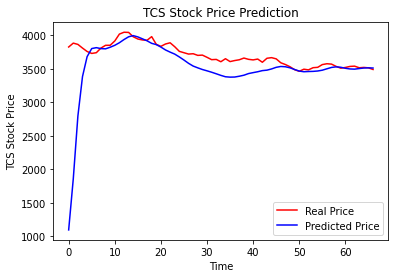

In [242]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()